In [36]:
import pandas as pd
df = pd.read_csv('avocado.csv')
df['Date'] = pd.to_datetime(df['Date'])

albany_df =df[df["region"]=="Albany"]
albany_df.set_index("Date",inplace=True)
#df["AveragePrice"].head(5)


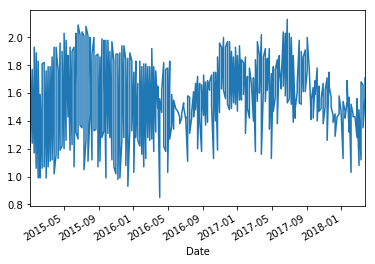

In [37]:
albany_df['AveragePrice'].plot()


In [38]:
albany_df.sort_index(inplace=True)
albany_df['Price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
albany_df=df.copy()[df['region']=='Albany']
albany_df.set_index("Date",inplace=True)
albany_df.sort_index(inplace=True)
albany_df['Price25ma'] = albany_df['AveragePrice'].rolling(25).mean()


In [40]:
albany_df.dropna().head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
2015-04-05,38,1.93,1526.10,15.75,202.52,0.00,1307.83,1307.83,0.00,0.00,organic,2015,Albany,1.4604
2015-04-12,37,1.76,1634.59,51.75,93.38,0.00,1489.46,1489.46,0.00,0.00,organic,2015,Albany,1.4600


In [42]:
# if working on all the regions
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [58]:
import pandas as pd
df = pd.read_csv('avocado.csv')
df = df.copy()[df['type']=='organic']
df['Date']= pd.to_datetime(df['Date'])
df.sort_values(by='Date',ascending=True, inplace=True)
df.head()

graph_df = pd.DataFrame()

for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index("Date",inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
        

graph_df.tail()

      

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,...,Houston_price25ma,Chicago_price25ma,Plains_price25ma,Indianapolis_price25ma,SouthCentral_price25ma,Columbus_price25ma,Albany_price25ma,Detroit_price25ma,NewOrleansMobile_price25ma,NewYork_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


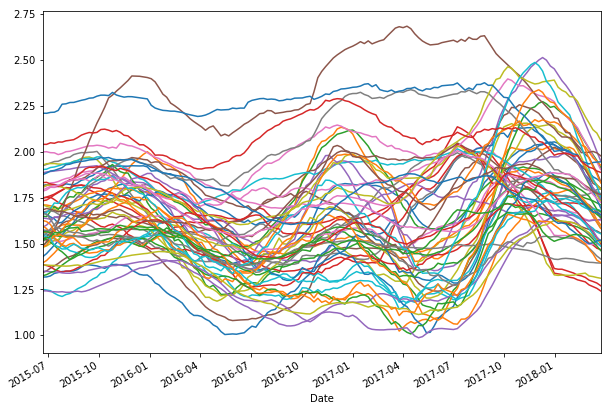

In [61]:
graph_df.dropna().plot(figsize=(10,7),legend=False)